In [ ]:
import pandas as pd # data analysis and storing data files
import numpy as np # calculations and math
import seaborn as sns # graphics

In [ ]:
df = pd.read_csv("titanic.csv")

In [ ]:
df.info()
# notice how we have 1309 people but onlu 1046 age... some data missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   gender     1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
df['age'].isnull()
# shows null values

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305     True
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [ ]:
def inpute_age(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return 39        # average age (median)
    elif pclass == 2:
      return 29
    else:
      return 24
  else:
    return age

In [ ]:
df['age'] = df[['age', 'pclass']].apply(inpute_age, axis=1)

<Axes: >

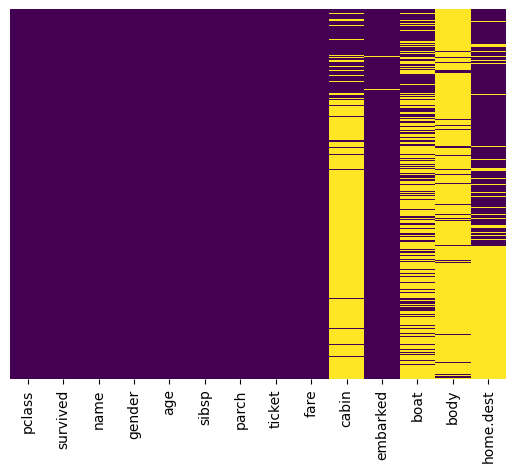

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
gender = pd.get_dummies(df['gender'], drop_first=True).astype(int)
embarked = pd.get_dummies(df['embarked'], drop_first=True).astype(int)

In [ ]:
gender

,male
0,0
1,1
2,0
3,1
4,0
...,...
1304,0
1305,0
1306,1
1307,1


In [ ]:
embarked

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,0
1305,0,0
1306,0,0
1307,0,0


In [ ]:
df.columns

Index(['pclass', 'survived', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
df.drop(['name', 'gender', 'ticket', 'fare', 'cabin'], inplace=True, axis=1)
df.drop(['boat', 'body', 'home.dest'], inplace=True, axis=1)

In [ ]:
df.head

<bound method NDFrame.head of       pclass  survived      age  sibsp  parch embarked
0          1         1  29.0000      0      0        S
1          1         1   0.9167      1      2        S
2          1         0   2.0000      1      2        S
3          1         0  30.0000      1      2        S
4          1         0  25.0000      1      2        S
...      ...       ...      ...    ...    ...      ...
1304       3         0  14.5000      1      0        C
1305       3         0  24.0000      1      0        C
1306       3         0  26.5000      0      0        C
1307       3         0  27.0000      0      0        C
1308       3         0  29.0000      0      0        S

[1309 rows x 6 columns]>

In [ ]:
df.drop(['embarked'], inplace=True, axis=1)
df = pd.concat([df, gender, embarked], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   male      1309 non-null   int64  
 6   Q         1309 non-null   int64  
 7   S         1309 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 81.9 KB


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('survived', axis=1), df['survived'], test_size=0.3, random_state=101)

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Select only the first two features for simplicity
X = X[:, :2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
# Train logistic regression without regularization (C=1)
logreg_no_reg = LogisticRegression(C=1, solver='lbfgs', max_iter=1000)
logreg_no_reg.fit(X_train, y_train)

# Train logistic regression with regularization (C=0.1)
logreg_reg = LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000)
logreg_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)